In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
plt.rcParams["figure.figsize"] = (8, 5.5)
unwanted_rows = [0, 1, 2, 3, 4]
maturities = [2, 3, 5, 7, 10, 20, 30]
MAX_PCA_COMPONENTS = 3

In [128]:
raw_df = pd.read_csv('FRB_H15-2.csv')
df = raw_df.drop(unwanted_rows)

df.head()

,Series Description,"Market yield on U.S. Treasury securities at 2-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 3-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 5-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 30-year constant maturity, quoted on investment basis"
5,1962-01-02,NaN,3.70,3.88,NaN,4.06,4.07,NaN
6,1962-01-03,NaN,3.70,3.87,NaN,4.03,4.07,NaN
7,1962-01-04,NaN,3.69,3.86,NaN,3.99,4.06,NaN
8,1962-01-05,NaN,3.71,3.89,NaN,4.02,4.07,NaN
9,1962-01-08,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [129]:
df = df.rename(columns={'Series Description': 'Date', 'Market yield on U.S. Treasury securities at 2-year   constant maturity, quoted on investment basis': '2-YR', 'Market yield on U.S. Treasury securities at 3-year   constant maturity, quoted on investment basis': '3-YR', 'Market yield on U.S. Treasury securities at 5-year   constant maturity, quoted on investment basis': '5-YR', 'Market yield on U.S. Treasury securities at 7-year   constant maturity, quoted on investment basis': '7-YR', 'Market yield on U.S. Treasury securities at 10-year   constant maturity, quoted on investment basis': '10-YR', 'Market yield on U.S. Treasury securities at 20-year   constant maturity, quoted on investment basis': '20-YR', 'Market yield on U.S. Treasury securities at 30-year   constant maturity, quoted on investment basis': '30-YR'})
df = df.set_index('Date')
df.head()

,2-YR,3-YR,5-YR,7-YR,10-YR,20-YR,30-YR
Date,,,,,,,
1962-01-02,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [130]:
def clean(raw_dataset):
    print('Has NaNs? :', raw_dataset.isna().values.any())
    print('Size = ', raw_dataset.shape)
    print('Removing \'ND\' values')
    for column in raw_dataset.columns:
        raw_dataset = raw_dataset[raw_dataset[column].str.contains('ND') == False]
    print('Size = ', raw_dataset.shape)
    raw_dataset = raw_dataset.astype('float64')
    return raw_dataset

In [249]:
def plot(eigen_vectors, eigen_values, factors):
    sorted_eigen_values = np.sort(eigen_values)
    for i in range(-1, ((-1) * MAX_PCA_COMPONENTS) - 1, -1):
        index = np.where(eigen_values == sorted_eigen_values[i])[0]
        label = 'Component-{component_number:d} ({weightage} %)'.format(component_number=(-1 * i), weightage =str(np.round((eigen_values[index] / np.sum(eigen_values)) * 100, 2)[0]))
        plt.plot(maturities, eigen_vectors[:, index] * factors[i], label=label)

    plt.legend()
    plt.grid()
    plt.xticks(maturities)
    plt.xlabel('Maturity')

In [250]:
def find_principal_components(start_date, end_date, factors=None, use_correlation = False):
    if factors is None:
        factors = [1, 1, 1]
    raw_dataset = df[start_date: end_date][:]
    dataset = clean(raw_dataset)
    dataset = dataset.diff().dropna()
    if use_correlation:
        eigen_values, eigen_vectors = np.linalg.eig(dataset.corr())
    else:
        eigen_values, eigen_vectors = np.linalg.eig(dataset.cov())
    plt.title('PCA Analysis from ' + start_date + ' to ' + end_date + ' using ' + ('Correlation' if use_correlation else 'Covariance'))
    plot(eigen_vectors, eigen_values, factors)
    plt.show()

Has NaNs? : False
Size =  (262, 7)
Removing 'ND' values
Size =  (251, 7)


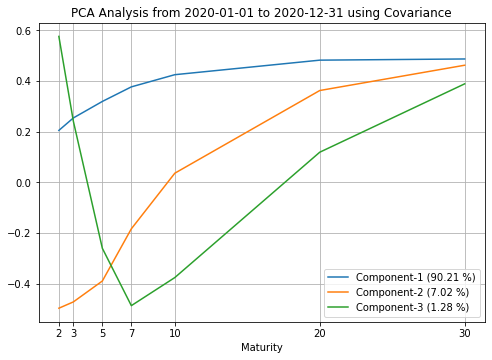

Has NaNs? : False
Size =  (262, 7)
Removing 'ND' values
Size =  (251, 7)


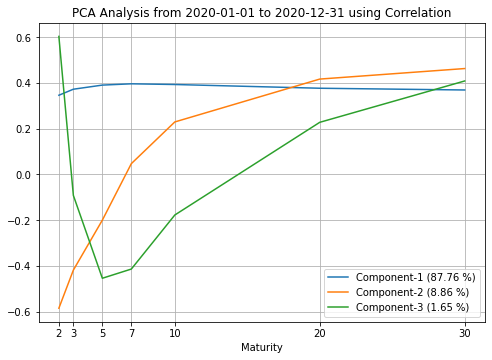

In [253]:
find_principal_components('2020-01-01', '2020-12-31', factors=[-1, -1, 1], use_correlation=False)
find_principal_components('2020-01-01', '2020-12-31', factors=[1, 1, 1], use_correlation=True)

Has NaNs? : False
Size =  (261, 7)
Removing 'ND' values
Size =  (251, 7)


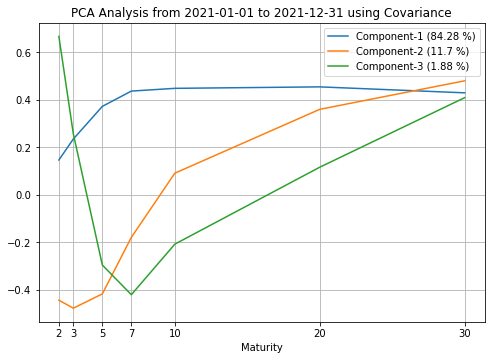

Has NaNs? : False
Size =  (261, 7)
Removing 'ND' values
Size =  (251, 7)


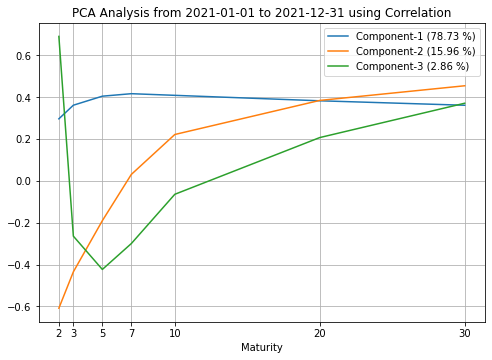

In [256]:
find_principal_components('2021-01-01', '2021-12-31', factors=[-1, -1, 1], use_correlation=False)
find_principal_components('2021-01-01', '2021-12-31', factors=[-1, -1, -1], use_correlation=True)

Has NaNs? : False
Size =  (165, 7)
Removing 'ND' values
Size =  (159, 7)


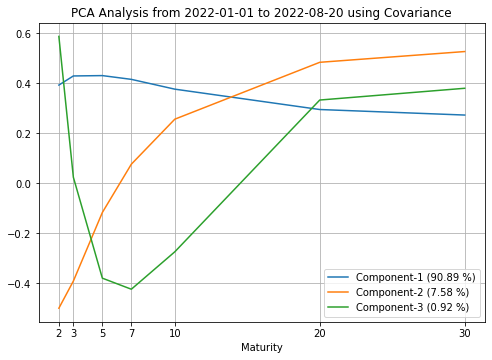

Has NaNs? : False
Size =  (165, 7)
Removing 'ND' values
Size =  (159, 7)


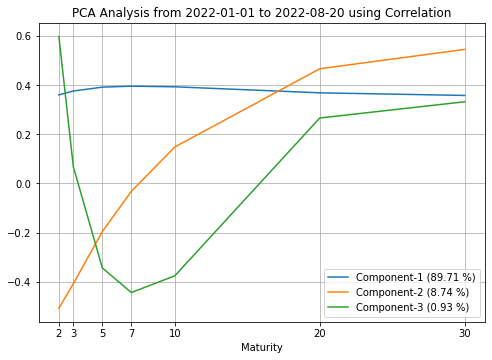

In [257]:
find_principal_components('2022-01-01', '2022-08-20', factors=[-1, 1, -1], use_correlation=False)
find_principal_components('2022-01-01', '2022-08-20', factors=[-1, -1, -1], use_correlation=True)

Has NaNs? : False
Size =  (165, 7)
Removing 'ND' values
Size =  (159, 7)


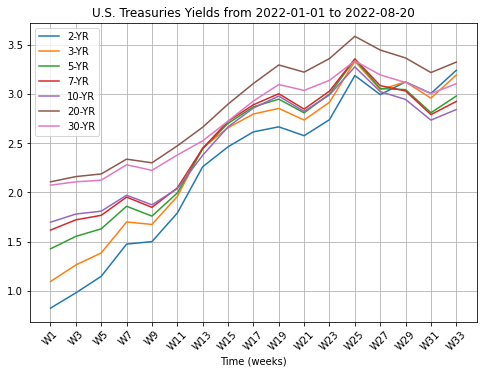

In [169]:
yield_start_date = '2022-01-01'
yield_end_date = '2022-08-20'
yield_info = df[yield_start_date : yield_end_date][:]
yield_info = clean(yield_info)
yield_info.index = pd.to_datetime(yield_info.index)
yield_info = yield_info.resample('2W').mean()
for maturity in maturities:
    plt.plot(yield_info.index, yield_info[str(maturity) + '-YR'], label=str(maturity) + '-YR')
plt.legend()
plt.xticks(yield_info.index, labels=['W' + str(w.week) for w in yield_info.index], rotation=45)
plt.xlabel('Time (weeks)')
plt.title('U.S. Treasuries Yields from ' + yield_start_date + ' to ' + yield_end_date)
plt.grid()
plt.show()

Has NaNs? : False
Size =  (154, 7)
Removing 'ND' values
Size =  (148, 7)


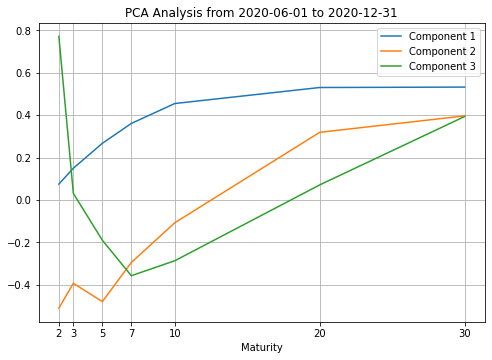

Has NaNs? : False
Size =  (154, 7)
Removing 'ND' values
Size =  (148, 7)


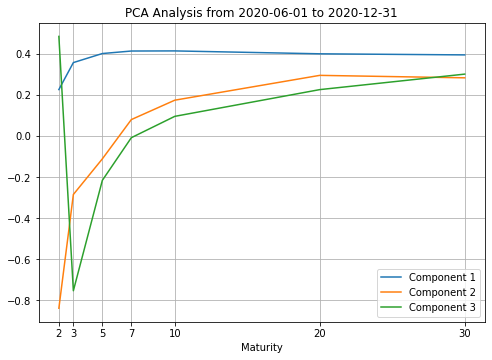

In [149]:
find_principal_components('2020-06-01', '2020-12-31', factors=[1, -1, -1], use_correlation=False)
find_principal_components('2020-06-01', '2020-12-31', factors=[-1, 1, 1], use_correlation=True)

In [261]:
clean(df).head()

Has NaNs? : True
Size =  (15820, 7)
Removing 'ND' values
Size =  (9687, 7)


,2-YR,3-YR,5-YR,7-YR,10-YR,20-YR,30-YR
Date,,,,,,,
1977-02-15,6.04,6.35,6.72,7.14,7.36,7.62,7.70
1977-02-16,6.02,6.32,6.70,7.10,7.34,7.57,7.67
1977-02-17,5.99,6.29,6.67,7.05,7.26,7.57,7.67
1977-02-18,6.06,6.40,6.82,7.18,7.41,7.64,7.76
1977-02-22,6.09,6.43,6.84,7.18,7.42,7.64,7.77


In [260]:
clean(df).diff()

Has NaNs? : True
Size =  (15820, 7)
Removing 'ND' values
Size =  (9687, 7)


,2-YR,3-YR,5-YR,7-YR,10-YR,20-YR,30-YR
Date,,,,,,,
1977-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-02-16,-0.02,-0.03,-0.02,-0.04,-0.02,-0.05,-0.03
1977-02-17,-0.03,-0.03,-0.03,-0.05,-0.08,0.00,0.00
1977-02-18,0.07,0.11,0.15,0.13,0.15,0.07,0.09
1977-02-22,0.03,0.03,0.02,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...
2022-08-16,0.05,0.05,0.04,0.04,0.03,0.00,0.01
2022-08-17,0.03,0.08,0.09,0.09,0.07,0.06,0.04
2022-08-18,-0.06,-0.04,-0.02,-0.02,-0.01,-0.02,-0.01
